In [3]:
import os
import numpy as np
import pandas as pd
import root_pandas as rpd
import matplotlib.pyplot as plt


Welcome to ROOTaaS 6.05/02


In [4]:
path='/shome/nchernya/HHbbgg_ETH_devel/outfiles/20181210_common_2016/'
outstr = "17_12_2018_2016training"
plotFolder = path+'plots/%s/'%outstr
if not os.path.exists(plotFolder):
    print plotFolder, "doesn't exist, creating it..."
    os.makedirs(plotFolder)
file='Total_preselection_diffNaming_transformedMVA.root'

/shome/nchernya/HHbbgg_ETH_devel/outfiles/20181210_common_2016/plots/17_12_2018_2016training/ doesn't exist, creating it...


In [5]:
data = rpd.read_root(path+file,'reducedTree_sig')

In [7]:
cuts_bdt = [0.,0.29,0.44,0.72,1.]
whats = ['leadingJetpt','subleadingJetpt','Mjj','Mgg']
ranges = [[0,300],[0,300],[80,160],[100,150]]
colors=['r','g','b','c']
cuts_MX = [250.,354.,478.,560.,2000.]
normalize=True
norm_plot='Norm'
if norm_plot == 'Norm' : normalize = True
elif norm_plot == 'noNorm' : normalize = False

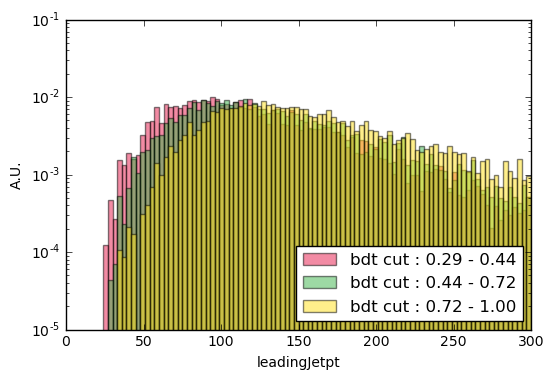

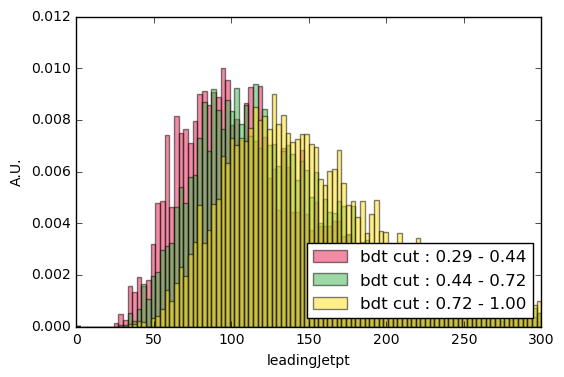

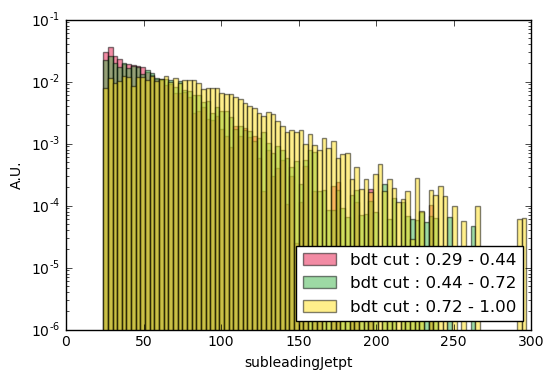

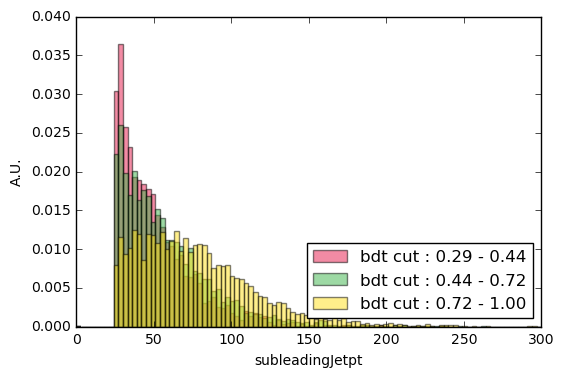

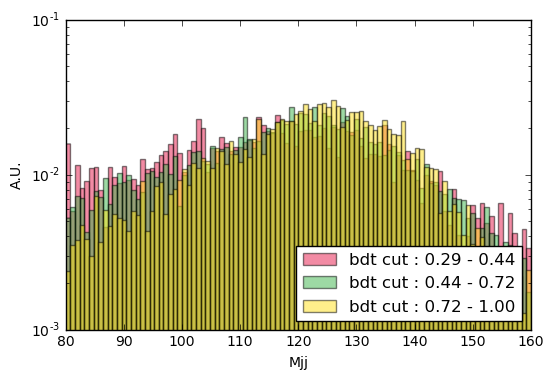

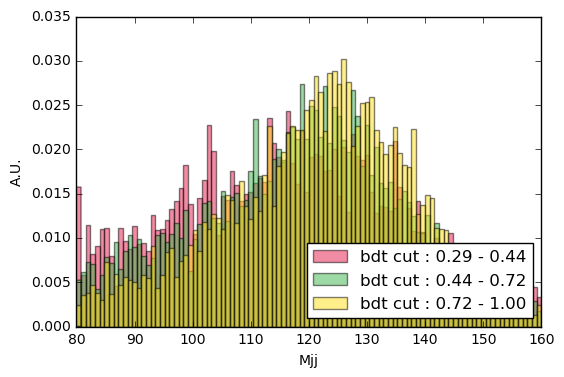

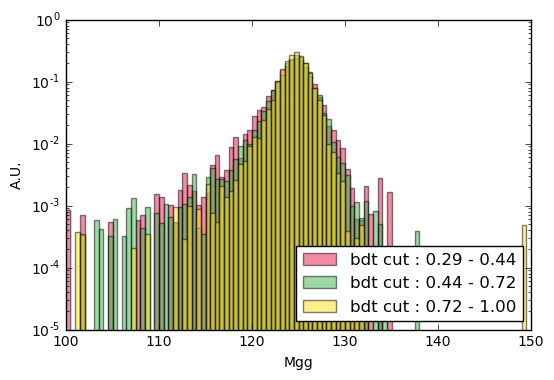

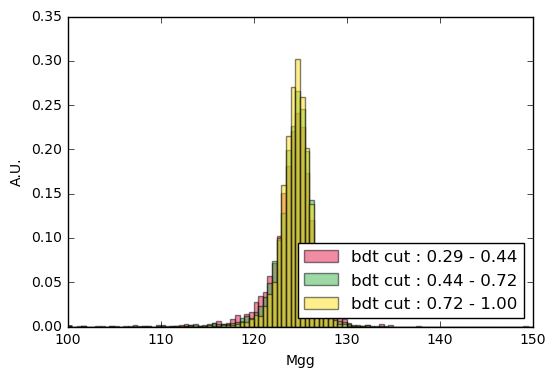

In [14]:
plt.clf()
logs = [True,False]
for what_num,what in enumerate(whats):
    for log in logs:
        if log==True : fig, ax = plt.subplots()
        for num in range(0,len(cuts_bdt)-1):
            if num==0 :  
                n, bins, patches = plt.hist(data[what][((data.MVAOutputTransformed > cuts_bdt[num]) & (data.MVAOutputTransformed < cuts_bdt[num+1]))], 
                                              bins=100,range=ranges[what_num],weights=data['weight'][((data.MVAOutputTransformed > cuts_bdt[num]) & (data.MVAOutputTransformed < cuts_bdt[num+1]))], 
                                          alpha=0.5,normed=normalize,facecolor=colors[num],label='bdt cut : %.2f - %.2f'%(cuts_bdt[num],cuts_bdt[num+1]))
            else : 
                _,_, patches = plt.hist(data[what][((data.MVAOutputTransformed > cuts_bdt[num]) & (data.MVAOutputTransformed < cuts_bdt[num+1]))], 
                                          bins=bins,weights=data['weight'][((data.MVAOutputTransformed > cuts_bdt[num]) & (data.MVAOutputTransformed < cuts_bdt[num+1]))], 
                                          alpha=0.5,normed=normalize,facecolor=colors[num],label='bdt cut : %.2f - %.2f'%(cuts_bdt[num],cuts_bdt[num+1]))        
            
        ax.set_yscale("log", nonposy='clip')        
        plt.xlabel(what)
        plt.ylabel('A.U.')
        plt.legend(loc = 'lower right')
        plt.savefig(plotFolder+what+'_bdt_cut_%s.pdf'%norm_plot)
        plt.savefig(plotFolder+what+'_bdt_cut_%s.png'%norm_plot)
        plt.show()


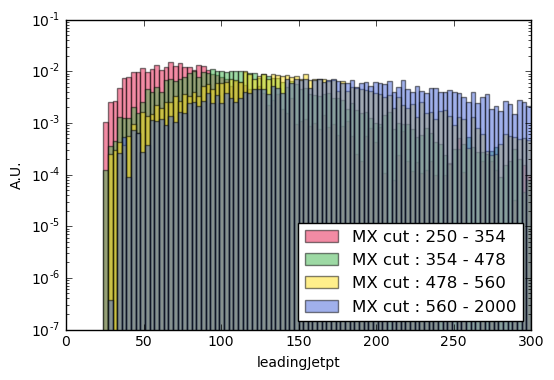

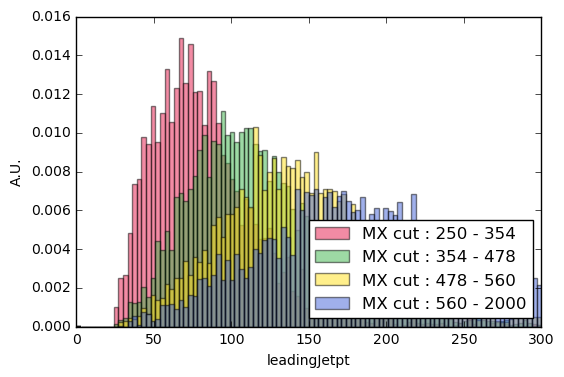

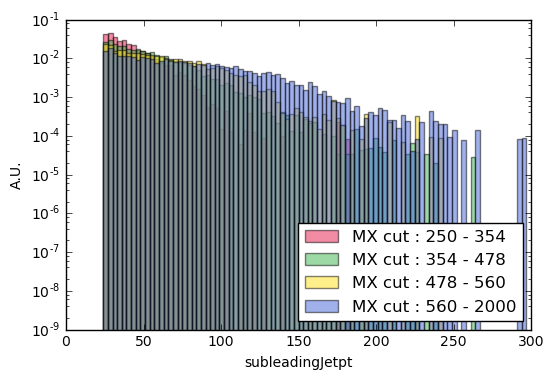

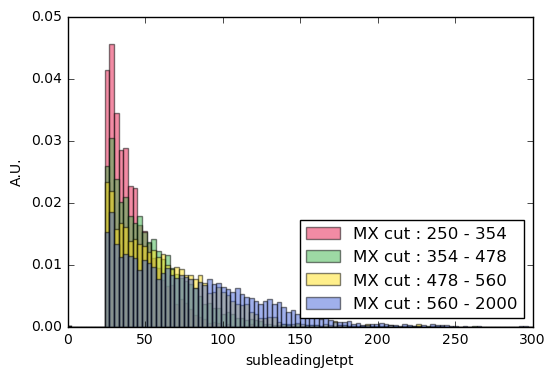

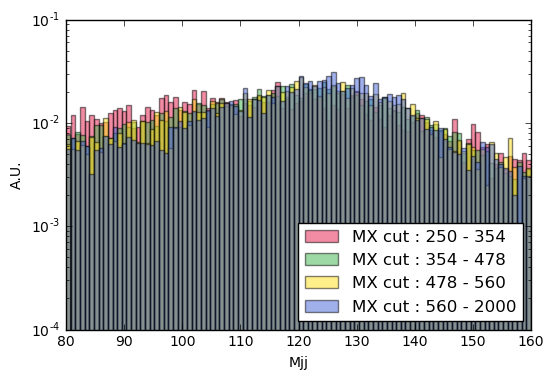

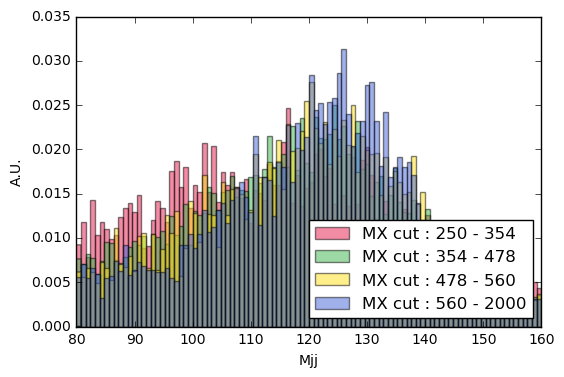

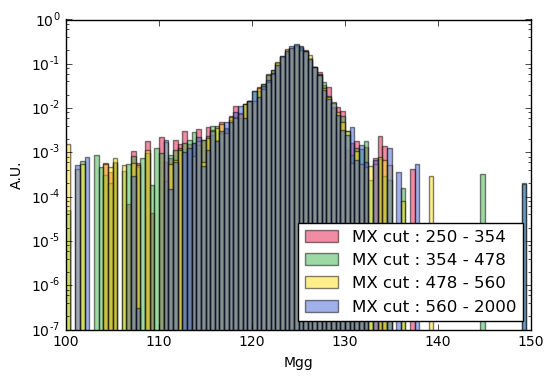

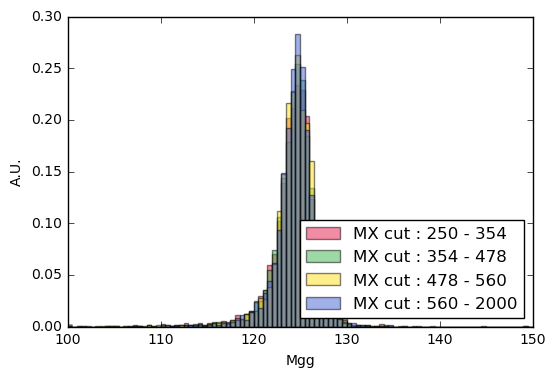

In [13]:
plt.clf()
logs = [True,False]
for what_num,what in enumerate(whats):
    for log in logs:
        if log==True : 
            fig, ax = plt.subplots()
            ax.set_yscale("log", nonposy='clip')        
        for num in range(0,len(cuts_MX)-1):
            if num==0 :  
                n, bins, patches = plt.hist(data[what][((data.MX > cuts_MX[num]) & (data.MX < cuts_MX[num+1]))], 
                                              bins=100,range=ranges[what_num],weights=data['weight'][((data.MX > cuts_MX[num]) & (data.MX < cuts_MX[num+1]))], 
                                          alpha=0.5,normed=normalize,facecolor=colors[num],label='MX cut : %.0f - %.0f'%(cuts_MX[num],cuts_MX[num+1]))
            else : 
                _,_, patches = plt.hist(data[what][((data.MX > cuts_MX[num]) & (data.MX < cuts_MX[num+1]))], 
                                          bins=bins,weights=data['weight'][((data.MX > cuts_MX[num]) & (data.MX < cuts_MX[num+1]))], 
                                          alpha=0.5,normed=normalize,facecolor=colors[num],label='MX cut : %.0f - %.0f'%(cuts_MX[num],cuts_MX[num+1]))        
            
        plt.xlabel(what)
        plt.ylabel('A.U.')
        plt.legend(loc = 'lower right')
        plt.savefig(plotFolder+what+'_MXcut_%s.pdf'%norm_plot)
        plt.savefig(plotFolder+what+'_MXcut_%s.png'%norm_plot)
        plt.show()


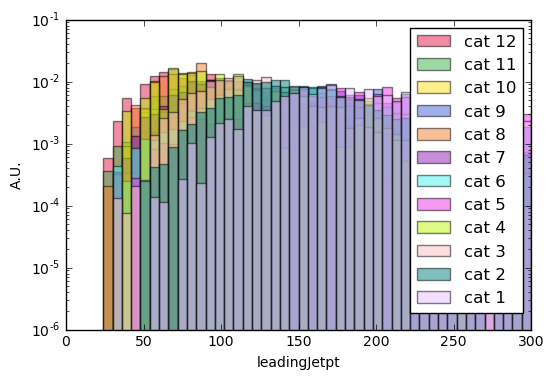

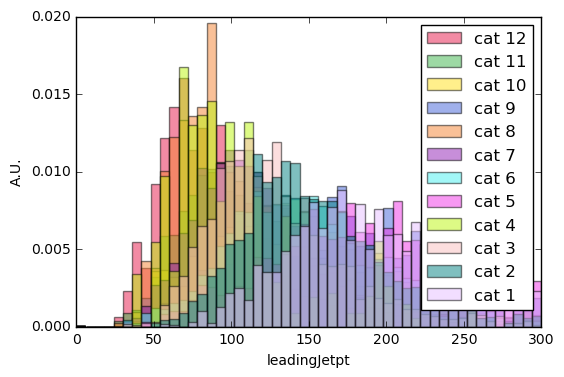

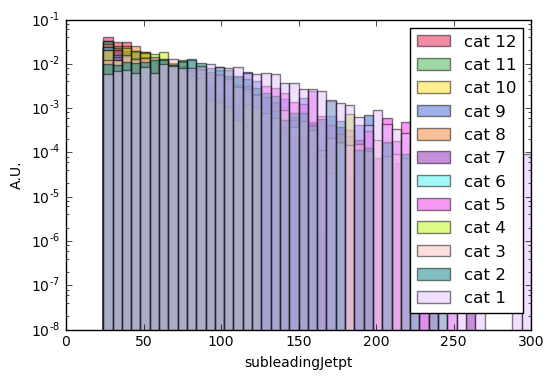

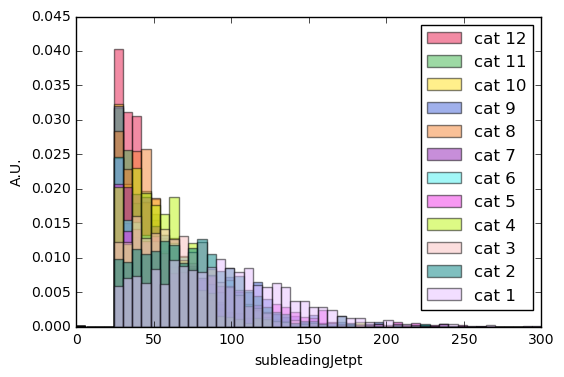

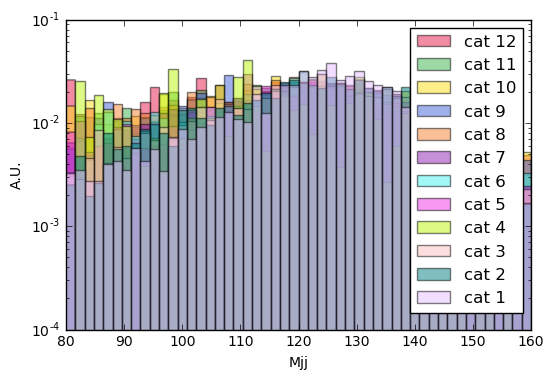

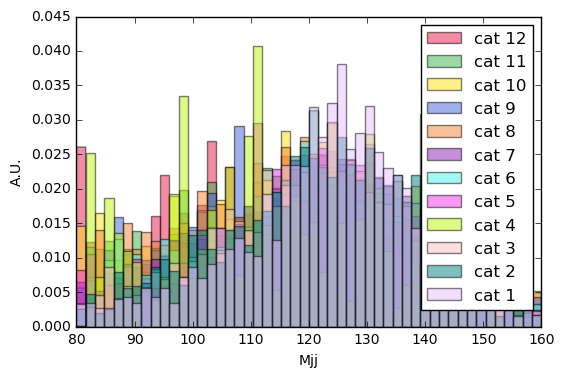

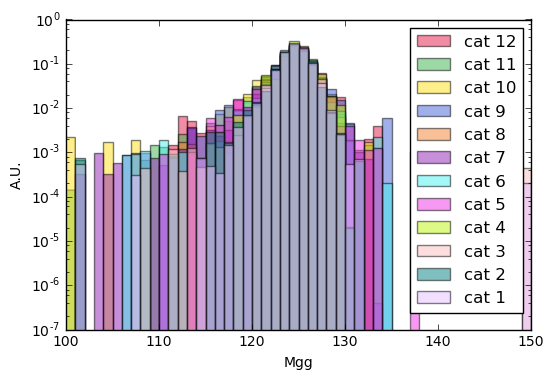

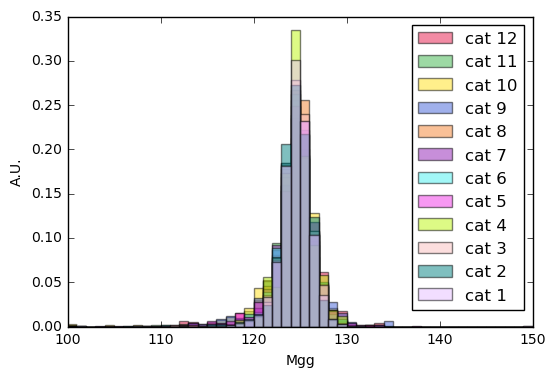

In [15]:
plt.clf()
logs = [True,False]
cats=np.linspace(12,0,13)
colors=['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w','b', 'g', 'r', 'c','m']
colors=['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', '#ffffff', '#000000']
cuts_bdt = [0.29,0.44,0.72,1.]
for what_num,what in enumerate(whats):
    for log in logs:
        if log==True : fig, ax = plt.subplots()
        cat_num=0
        for num in range(0,len(cuts_bdt)-1):
            for num_MX in range(0,len(cuts_MX)-1):
                cat=cats[cat_num]
                if num==0 and num_MX==0  and cat_num==0 : 
                    n, bins, patches = plt.hist(data[what][((data.MVAOutputTransformed > cuts_bdt[num]) & (data.MVAOutputTransformed < cuts_bdt[num+1])&(data.MX > cuts_MX[num_MX]) & (data.MX < cuts_MX[num_MX+1]))], 
                                              bins=50,range=ranges[what_num],weights=data['weight'][((data.MVAOutputTransformed > cuts_bdt[num]) & (data.MVAOutputTransformed < cuts_bdt[num+1])&(data.MX > cuts_MX[num_MX]) & (data.MX < cuts_MX[num_MX+1]))], 
                                          alpha=0.5,normed=normalize,facecolor=colors[cat_num],label='cat %d'%cat)
                else : 
                    _,_, patches = plt.hist(data[what][((data.MVAOutputTransformed > cuts_bdt[num]) & (data.MVAOutputTransformed < cuts_bdt[num+1])&(data.MX > cuts_MX[num_MX]) & (data.MX < cuts_MX[num_MX+1]))], 
                                          bins=bins,weights=data['weight'][((data.MVAOutputTransformed > cuts_bdt[num]) & (data.MVAOutputTransformed < cuts_bdt[num+1])&(data.MX > cuts_MX[num_MX]) & (data.MX < cuts_MX[num_MX+1]))], 
                                          alpha=0.5,normed=normalize,facecolor=colors[cat_num],label='cat %d'%cat)    
                cat_num+=1
        ax.set_yscale("log", nonposy='clip')        
        plt.xlabel(what)
        plt.ylabel('A.U.')
        plt.legend(loc = 'upper right')
        plt.savefig(plotFolder+what+'_bdtMX_cuts_%s.pdf'%norm_plot)
        plt.savefig(plotFolder+what+'_bdtMX_cuts_%s.png'%norm_plot)
        plt.show()
